In [2]:
# 8-15 January
import pandas as pd
import numpy as np
from io import StringIO


data = pd.read_csv('../datasets/2011.ehpcsv.txt')
data['time'] = pd.to_datetime(data['time'])

start_date = '2011-01-08'
end_date = '2011-01-15'
filtered_data = data[(data['time'] >= start_date) & (data['time'] <= end_date)] # By Date
filtered_data = filtered_data[filtered_data['place'].str.contains('Cobb', case=False, na=False)] # By Location
filtered_data.to_csv('../datasets/filtered_data.csv', index=False)


## FX Helper

In [3]:
import csv
def saveValidShapeletAsCsv(file='series_a', shapelets=[]):
    csv_file_path = f'{file}.csv'

    # Open the CSV file in write mode
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        writer.writerow(['shapelet', 'ig'])
        
        for entry in shapelets:
            shapelet = entry['shapelet']
            val_ig = entry['IG']
            shapelet_str = ', '.join(map(str, shapelet))
            writer.writerow([shapelet_str, val_ig])

    print(f"Data saved to {csv_file_path}")

def loadShapeletFromCsv(file='series_a'):
    csv_file_path = f'{file}.csv'
    shapelets = []

    # Open the CSV file in read mode
    with open(csv_file_path, mode='r') as file:
        reader = csv.DictReader(file)
        
        for row in reader:
            shapelet_str = row['shapelet']
            ig = float(row['ig'])  # Convert 'ig' to float
            shapelet = list(map(float, shapelet_str.split(', ')))  # Convert shapelet string back to list of floats
            shapelets.append({'shapelet': shapelet, 'IG': ig})
    
    return shapelets

In [4]:
filtered_data.reset_index(drop=True, inplace=True)
filtered_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2011-01-08 06:02:38.930000+00:00,38.82433,-122.78883,0.798,0.89,d,7,223.0,1.0,0.06,...,2011-01-08T06:04:10.000Z,"Cobb, CA",eq,0.95,0.57,0.01,9,A,NC,NC
1,2011-01-08 06:15:37.280000+00:00,38.82217,-122.77866,-0.193,0.45,d,6,131.0,1.0,0.01,...,2011-01-08T06:17:10.000Z,"Cobb, CA",eq,0.30,0.75,0.06,8,A,NC,NC
2,2011-01-08 07:06:47.440000+00:00,38.84184,-122.79034,-0.832,0.43,d,5,163.0,3.0,0.01,...,2011-01-08T07:08:21.000Z,"Cobb, CA",eq,0.74,4.11,0.13,7,A,NC,NC
3,2011-01-08 07:31:32.160000+00:00,38.83567,-122.80550,0.214,0.38,d,8,68.0,1.0,0.03,...,2011-01-08T07:33:05.000Z,"Cobb, CA",eq,0.28,1.05,0.07,8,A,NC,NC
4,2011-01-08 12:00:34.180000+00:00,38.83800,-122.78400,1.540,1.18,d,57,82.0,1.0,0.07,...,2011-01-12T19:13:44.000Z,"Cobb, CA",eq,0.12,0.16,0.12,14,F,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2011-01-14 05:41:57.310000+00:00,38.83000,-122.80200,1.273,0.88,d,11,95.0,1.0,0.02,...,2011-01-14T05:43:31.000Z,"Cobb, CA",eq,0.36,0.48,0.03,13,A,NC,NC
67,2011-01-14 08:06:04.040000+00:00,38.83533,-122.78584,1.356,0.88,d,10,142.0,2.0,0.04,...,2011-01-14T08:07:36.000Z,"Cobb, CA",eq,0.34,0.59,0.08,11,A,NC,NC
68,2011-01-14 15:30:59.260000+00:00,38.83083,-122.79300,1.843,1.13,d,40,42.0,1.0,0.06,...,2011-01-14T21:04:53.000Z,"Cobb, CA",eq,0.16,0.21,0.12,8,F,NC,NC
69,2011-01-14 16:53:29.650000+00:00,38.83983,-122.82684,1.006,0.19,d,6,131.0,2.0,0.03,...,2011-01-14T16:55:02.000Z,"Cobb, CA",eq,0.49,0.74,0.11,7,A,NC,NC


# Basic EDA
---
From this step we found that there's 2 class that indicated by feature 'status'. It is class reflecting on environmental condition:
Class A (Low): Reflects signals during regular, undisturbed conditions.
Class F (High): Could occur during phenomena such as storms, explosions, or other events that generate intense waves or signals.

When the series split by class, it proof that the class F is less frequent and has higher value in 'mag' or magnitude.


In [6]:
display(filtered_data["status"].unique())
display(filtered_data["type"].unique())
display(filtered_data.columns)

array(['A', 'F'], dtype=object)

array(['eq'], dtype=object)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

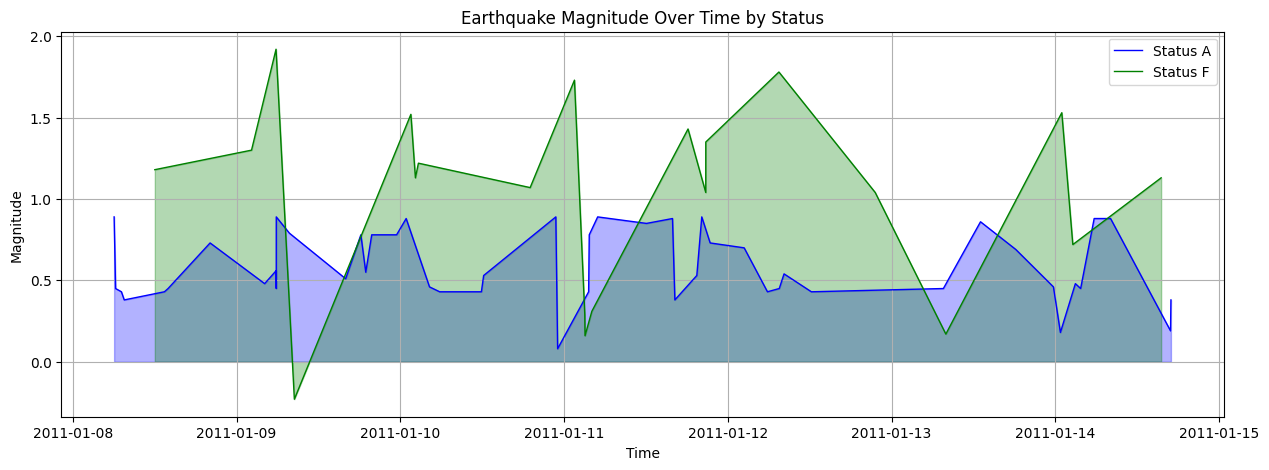

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

dataframe = filtered_data

dataframe['time'] = pd.to_datetime(dataframe['time'])
# dataframe = dataframe.sort_values(by='time')

data_A = dataframe[dataframe['status'] == 'A']
data_F = dataframe[dataframe['status'] == 'F']

# Plot the data
plt.figure(figsize=(15, 5))

# Plot data for status A
plt.plot(data_A['time'], data_A['mag'], color='blue', linewidth=1, label='Status A')
plt.fill_between(data_A['time'], data_A['mag'], color='blue', alpha=0.3)

# Plot data for status F
plt.plot(data_F['time'], data_F['mag'], color='green', linewidth=1, label='Status F')
plt.fill_between(data_F['time'], data_F['mag'], color='green', alpha=0.3)

plt.title('Earthquake Magnitude Over Time by Status')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.show()


In [8]:
dataframe[['time','mag','status']].head(15)

,time,mag,status
0,2011-01-08 06:02:38.930000+00:00,0.89,A
1,2011-01-08 06:15:37.280000+00:00,0.45,A
2,2011-01-08 07:06:47.440000+00:00,0.43,A
3,2011-01-08 07:31:32.160000+00:00,0.38,A
4,2011-01-08 12:00:34.180000+00:00,1.18,F
5,2011-01-08 13:24:23.170000+00:00,0.43,A
6,2011-01-08 13:24:55.950000+00:00,0.43,A
7,2011-01-08 13:57:12.200000+00:00,0.45,A
8,2011-01-08 20:06:40.920000+00:00,0.73,A
9,2011-01-09 02:11:03.640000+00:00,1.30,F


<Figure size 2500x500 with 0 Axes>

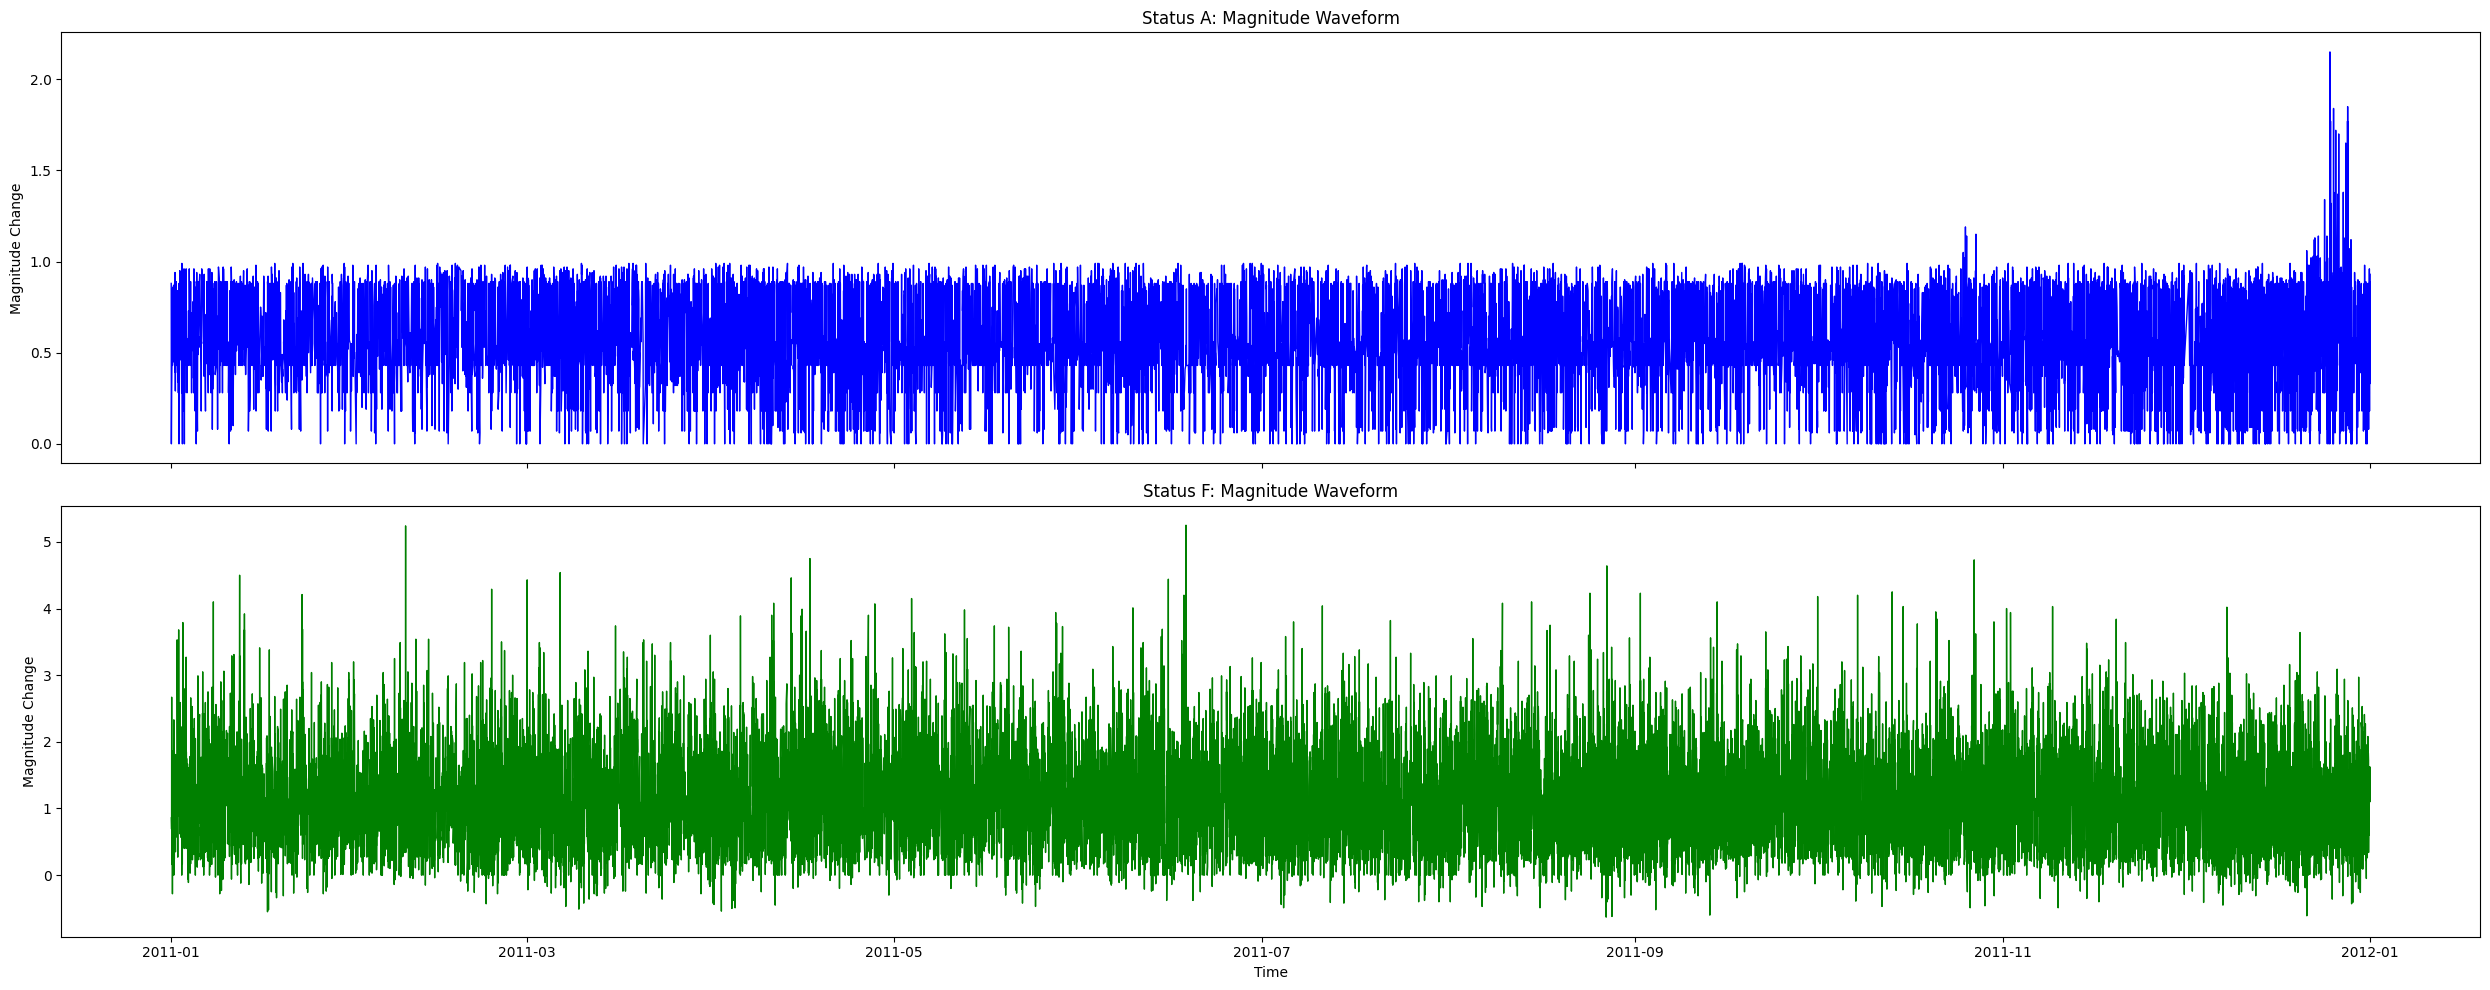

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
data['time'] = pd.to_datetime(data['time'])

# Split data by status
data_a = data[data['status'] == 'A'].copy()
data_f = data[data['status'] == 'F'].copy()

# magnitude_waveform
# data_A['mag_wf'] = data_A['mag'].diff().fillna(0)
# data_F['mag_wf'] = data_F['mag'].diff().fillna(0)

plt.figure(figsize=(25, 5))

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

# Plot status A
ax[0].plot(data_a['time'], data_a['mag'], color='blue', linewidth=1)
ax[0].set_title('Status A: Magnitude Waveform')
ax[0].set_ylabel('Magnitude Change')
ax[0].grid(False)

# Plot status F
ax[1].plot(data_f['time'], data_f['mag'], color='green', linewidth=1)
ax[1].set_title('Status F: Magnitude Waveform')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitude Change')
ax[1].grid(False)

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

In [10]:
ts1 = data_A[['time','mag']]
ts2 = data_F[['time','mag']]
display(ts1.head())
display(ts2.head())


,time,mag
0,2011-01-01 00:21:06.570000+00:00,0.88
2,2011-01-01 00:58:13.270000+00:00,0.00
4,2011-01-01 02:04:41.480000+00:00,0.28
7,2011-01-01 03:11:04.720000+00:00,0.43
11,2011-01-01 04:07:14.660000+00:00,0.85


,time,mag
1,2011-01-01 00:52:59.550000+00:00,0.86
3,2011-01-01 01:44:16.230000+00:00,0.69
5,2011-01-01 02:09:58.630000+00:00,2.67
6,2011-01-01 02:53:49.640000+00:00,1.03
8,2011-01-01 03:32:55.630000+00:00,0.16


# Step 1 "Generate Shapelet Candidate":
---
We use 2 class from from the series that indicates as defined below:
- Type A: Attenuation Dominated (Low-Frequency) Ground Wave
- Type F: Field Strength Dominated (Higher-Frequency) Ground Wave

In [11]:
import pandas as pd
import numpy as np

def generate_shapelet_candidate(time_series, min_length=5, max_length=15, variance_threshold=0, debug=False):
    """
    Dynamically segment the time series into shapelet candidates based on variance.
    
    Parameters:
        time_series (np.array): The time series data.
        min_length (int): Minimum length of each segment.
        max_length (int): Maximum length of each segment.
        variance_threshold (float): Variance threshold for splitting segments.
        debug (bool): If True, print debug information about segment variances.
        
    Returns:
        list: A list of dynamically segmented shapelet candidates.
    """
    shapelet_candidates = []
    series_length = len(time_series)
    start_idx = 0

    while start_idx < series_length:
        segment_found = False

        for length in range(min_length, max_length + 1):
            end_idx = start_idx + length
            if end_idx > series_length:
                break
            segment = time_series[start_idx:end_idx]
            segment_variance = np.var(segment)

            if debug:
                print(f"Start: {start_idx}, End: {end_idx}, Segment: {segment}, Variance: {segment_variance}")

            # Split the segment if variance exceeds the threshold
            if segment_variance >= variance_threshold:
                shapelet_candidates.append(segment)
                start_idx = end_idx  # Move to the next segment
                segment_found = True
                break

        if not segment_found:
            start_idx += min_length

    if not shapelet_candidates and debug:
        print("No shapelet candidates found. Consider lowering the variance threshold or analyzing the data.")

    return shapelet_candidates

In [12]:
shapelet_candidates_A = generate_shapelet_candidate(
    ts1['mag'].values, min_length=3, max_length=15
)

print(f"Number of Shapelet Candidates: {len(shapelet_candidates_A)}")
for idx, candidate in enumerate(shapelet_candidates_A[:5]):  # Print first 5 shapelets
    print(f"Shapelet {idx+1}: {candidate}")

Number of Shapelet Candidates: 4209
Shapelet 1: [0.88 0.   0.28]
Shapelet 2: [0.43 0.85 0.43]
Shapelet 3: [0.52 0.86 0.57]
Shapelet 4: [0.45 0.87 0.72]
Shapelet 5: [0.51 0.54 0.56]


In [13]:
shapelet_candidates_F = generate_shapelet_candidate(
    ts2['mag'].values, min_length=5, max_length=15
)

print(f"Number of Shapelet Candidates: {len(shapelet_candidates_F)}")
for idx, candidate in enumerate(shapelet_candidates_F[:5]):  # Print first 5 shapelets
    print(f"Shapelet {idx+1}: {candidate}")

Number of Shapelet Candidates: 4139
Shapelet 1: [0.86 0.69 2.67 1.03 0.16]
Shapelet 2: [ 0.56  0.51  0.49 -0.28  1.34]
Shapelet 3: [0.48 1.35 1.86 1.41 0.89]
Shapelet 4: [0.26 0.64 1.83 1.19 0.  ]
Shapelet 5: [2.33 0.72 0.89 0.9  0.85]


## Step 2 "Calculate Shapelet Distance" & Step 3 "Assesment Shapelet Quality" & Step 4 "Discovery of Shapelet":

In [14]:
def compute_shapelet_distances(shapelet, time_series):
    """
    Compute the squared Euclidean distance between a shapelet and all subsequences
    of the same length in the time series.
    """
    shapelet_length = len(shapelet)
    series_length = len(time_series)
    distances = []
    for start_idx in range(series_length - shapelet_length + 1):
        subsequence = time_series[start_idx:start_idx + shapelet_length]
        distance = np.sum((shapelet - subsequence) ** 2)  # Squared Euclidean Distance
        distances.append(distance)
    return np.array(distances)

def entropy(labels):
    """
    Calculate the entropy of a dataset.
    """
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    # Add small value to avoid log(0)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

def compute_information_gain(shapelet, time_series, labels):
    """
    Compute the Information Gain (IG) for a shapelet.
    """
    distances = compute_shapelet_distances(shapelet, time_series)
    total_size = len(distances)
    total_entropy = entropy(labels)  # H(T)
    
    print('now run:',shapelet)
    
    # Sort distances and labels
    sorted_indices = np.argsort(distances)
    sorted_labels = labels[sorted_indices]
    
    max_ig = 0
    
    for i in range(1, total_size):
        # Split the data at the current threshold
        T_x_labels = sorted_labels[:i]
        T_y_labels = sorted_labels[i:]
        
        # Calculate entropies of the subsets
        H_T_x = entropy(T_x_labels)
        H_T_y = entropy(T_y_labels)
        
        # Calculate the weighted average of subset entropies
        weighted_entropy = (len(T_x_labels) / total_size) * H_T_x + \
                           (len(T_y_labels) / total_size) * H_T_y
        
        # Calculate Information Gain
        ig = total_entropy - weighted_entropy
        
        # Track the maximum IG
        max_ig = max(max_ig, ig)
    
    return max_ig

In [16]:
valid_shapelets_A = []

labels = np.array([0, 1] * (len(ts1) // 2))[:len(ts1)]

for shapelet in shapelet_candidates_A:
    ig = compute_information_gain(shapelet, ts1['mag'].values, labels)
    if 0 <= ig <= 1:  # Threshold 0-1
        valid_shapelets_A.append({"shapelet": shapelet, "IG": ig})

# Convert to structured array
valid_shapelets_array_A = np.array(valid_shapelets_A)

# Print results
print(f"Number of valid shapelets: {len(valid_shapelets_array_A)}")
for idx, entry in enumerate(valid_shapelets_array_A[:5]):  # Display first 5 valid shapelets
    print(f"Shapelet {idx + 1}: {entry['shapelet']}, IG: {entry['IG']:.4f}")
#214m.54.7s

now run: [0.88 0.   0.28]
now run: [0.43 0.85 0.43]
now run: [0.52 0.86 0.57]
now run: [0.45 0.87 0.72]
now run: [0.51 0.54 0.56]
now run: [0.88 0.83 0.94]
now run: [0.5  0.47 0.5 ]
now run: [0.29 0.88 0.39]
now run: [0.56 0.71 0.89]
now run: [0.78 0.51 0.89]
now run: [0.6  0.75 0.43]
now run: [0.51 0.84 0.57]
now run: [0.37 0.34 0.51]
now run: [0.77 0.28 0.57]
now run: [0.77 0.69 0.88]
now run: [0.   0.61 0.95]
now run: [0.55 0.91 0.8 ]
now run: [0.46 0.9  0.55]
now run: [0.28 0.88 0.99]
now run: [0.47 0.55 0.33]
now run: [0.   0.77 0.33]
now run: [0.61 0.77 0.18]
now run: [0.35 0.96 0.43]
now run: [0.87 0.65 0.32]
now run: [0.   0.51 0.28]
now run: [0.48 0.89 0.87]
now run: [0.91 0.51 0.59]
now run: [0.96 0.89 0.43]
now run: [0.49 0.28 0.43]
now run: [0.53 0.58 0.43]
now run: [0.73 0.52 0.67]
now run: [0.55 0.96 0.47]
now run: [0.51 0.43 0.56]
now run: [0.89 0.56 0.49]
now run: [0.55 0.72 0.28]
now run: [0.67 0.51 0.56]
now run: [0.55 0.52 0.57]
now run: [0.78 0.36 0.43]
now run: [0.

In [17]:
print('Candidate',len(shapelet_candidates_A))
print('Assesment',len(valid_shapelets_array_A))
print(valid_shapelets_array_A[0])
saveValidShapeletAsCsv('../output/shapelet-nosmooth/series_a', valid_shapelets_array_A)

Candidate 4209
Assesment 4209
{'shapelet': array([0.88, 0.  , 0.28]), 'IG': 0.0002376456759931589}
Data saved to series_a.csv


In [18]:
valid_shapelets_F = []

labels = np.array([0, 1] * (len(ts2) // 2))[:len(ts2)]

for shapelet in shapelet_candidates_F:
    ig = compute_information_gain(shapelet, ts2['mag'].values, labels)  # Pass valid labels
    if 0 <= ig <= 1:  # Threshold 0-1
        valid_shapelets_F.append({"shapelet": shapelet, "IG": ig})

# Convert to structured array
valid_shapelets_array_F = np.array(valid_shapelets_F)

# Print results
print(f"Number of valid shapelets: {len(valid_shapelets_array_F)}")
for idx, entry in enumerate(valid_shapelets_array_F[:5]):  # Display first 5 valid shapelets
    print(f"Shapelet {idx + 1}: {entry['shapelet']}, IG: {entry['IG']:.4f}")
#525m 18.5s

now run: [0.86 0.69 2.67 1.03 0.16]
now run: [ 0.56  0.51  0.49 -0.28  1.34]
now run: [0.48 1.35 1.86 1.41 0.89]
now run: [0.26 0.64 1.83 1.19 0.  ]
now run: [2.33 0.72 0.89 0.9  0.85]
now run: [0.65 0.27 0.24 0.97 0.99]
now run: [1.22 1.29 1.03 0.64 0.38]
now run: [0.65 1.13 0.62 0.84 0.35]
now run: [1.81 1.34 1.8  0.69 1.08]
now run: [0.57 3.53 0.28 0.27 1.13]
now run: [0.89 1.35 1.2  1.24 3.68]
now run: [1.48 1.28 1.4  1.83 1.02]
now run: [1.41 1.46 1.34 1.08 0.62]
now run: [2.01 1.09 2.59 1.41 1.88]
now run: [1.35 0.57 1.   0.9  2.22]
now run: [0.67 2.22 0.   1.08 1.76]
now run: [0.17 1.34 0.79 2.38 1.23]
now run: [3.79 1.91 1.44 0.89 1.1 ]
now run: [0.93 1.41 0.49 0.4  0.55]
now run: [1.37 0.87 1.2  2.8  2.21]
now run: [1.59 0.95 1.49 1.21 1.11]
now run: [0.98 1.32 1.29 1.82 1.11]
now run: [3.27 0.4  0.63 1.85 1.47]
now run: [0.57 1.75 1.19 0.68 1.  ]
now run: [1.45 0.65 0.58 1.67 1.05]
now run: [0.07 1.48 0.39 1.38 0.63]
now run: [ 1.1  -0.06  1.18  0.97  1.2 ]
now run: [-0.11  0

In [19]:
print('Candidate',len(shapelet_candidates_F))
print('Assesment',len(valid_shapelets_array_F))
print(valid_shapelets_array_F[0])
saveValidShapeletAsCsv('../output/shapelet-nosmooth/series_f', valid_shapelets_array_F)

Candidate 4139
Assesment 4139
{'shapelet': array([0.86, 0.69, 2.67, 1.03, 0.16]), 'IG': 0.00016674829744833808}
Data saved to series_f.csv


In [12]:
valid_shapelets_array_A = loadShapeletFromCsv('../output/shapelet-nosmooth/series_a')
valid_shapelets_array_F = loadShapeletFromCsv('../output/shapelet-nosmooth/series_f')

Selecting shapelet within treshold

In [13]:
discover_A = [item for item in valid_shapelets_array_A if 0.0005 <= item['IG'] <= 1]
discover_A = sorted(discover_A, key=lambda x: x['IG'], reverse=True)
display(len(discover_A))

705

In [14]:
discover_F = [item for item in valid_shapelets_array_F if 0.0005 <= item['IG'] <= 1]
discover_F = sorted(discover_F, key=lambda x: x['IG'], reverse=True)
display(len(discover_F))

10

# Step 5 "Shapelet Transform":

In [15]:
def visualizeShapeletTransform(label, data, legend=True):
    combined_shapelets = np.concatenate([entry['shapelet'] for entry in data])
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, len(data)))
    plt.plot(combined_shapelets, color='black', linestyle='--', label='Combined Shapelets', alpha=0.7)

    start_idx = 0
    for idx, entry in enumerate(data):
        shapelet = entry['shapelet']
        length = len(shapelet)
        end_idx = start_idx + length
        plt.plot(range(start_idx, end_idx), shapelet, color=colors[idx], label=f'Shapelet {idx+1}', alpha=0.9, linewidth=2)
        start_idx = end_idx

    plt.title(f'Shapelet Transform {label}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    if legend:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

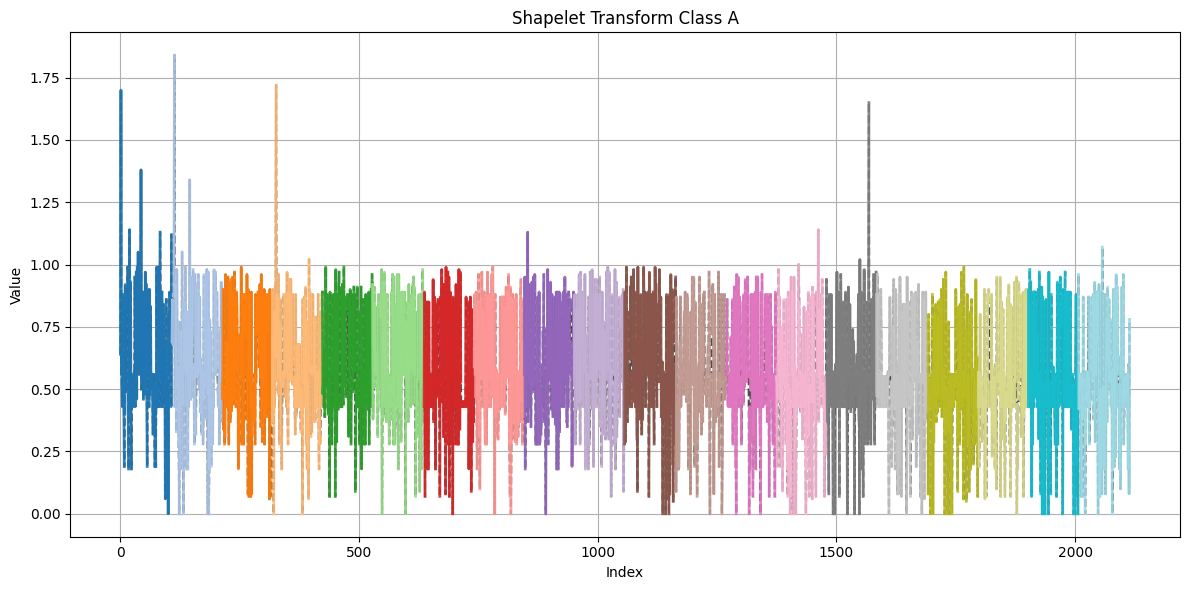

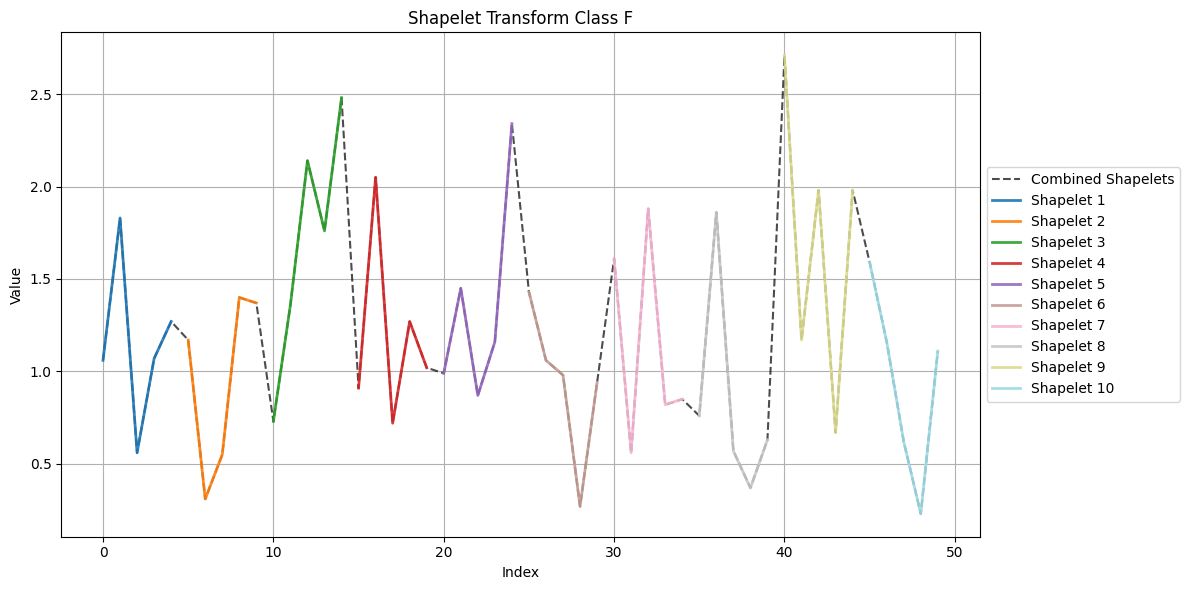

In [48]:
(visualizeShapeletTransform('Class A', discover_A, legend=False))
(visualizeShapeletTransform('Class F', discover_F))

In [42]:
combined_shapelets_A = np.concatenate([entry['shapelet'] for entry in discover_A])
combined_shapelets_F = np.concatenate([entry['shapelet'] for entry in discover_F])

df_c_A = pd.DataFrame(combined_shapelets_A, columns=['mag'])
df_c_A.to_csv('../output/shapelet-nosmooth/combined_shapelets_A.csv', index=False)

df_c_F = pd.DataFrame(combined_shapelets_F, columns=['mag'])
df_c_F.to_csv('../output/shapelet-nosmooth/combined_shapelets_F.csv', index=False)


# Random Forest Classsification

In [25]:
def makeAsFeature(data, label):
    sequence = len(data[0]['shapelet'])
    columns = [f'shapelet_{i}' for i in range(1, sequence + 1)]
    df = pd.DataFrame([entry['shapelet'] for entry in data], columns=columns)
    df['class'] = label
    return df,sequence

In [27]:
df_A, num_shapelet = makeAsFeature(discover_A, 'A')
df_A.head(3)

,shapelet_1,shapelet_2,shapelet_3,class
0,0.64,1.70,0.56,A
1,0.53,0.43,0.87,A
2,0.88,0.47,0.19,A


In [29]:
df_F, num_shapelet = makeAsFeature(discover_F, 'F')
df_F.head(3)

,shapelet_1,shapelet_2,shapelet_3,shapelet_4,shapelet_5,class
0,1.06,1.83,0.56,1.07,1.27,F
1,1.17,0.31,0.55,1.40,1.37,F
2,0.73,1.36,2.14,1.76,2.48,F
